In [48]:
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
import os
import numpy as np
import cartopy.crs as ccrs
from shared_astro_utils import matching_utils
from astropy import units as u
from PIL import Image
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_context('notebook')

In [49]:
os.chdir('/home/walml/repos/zoobot')

In [50]:
gz2 = pd.read_csv('data/gz2/gz2_classifications_and_subjects.csv')

dr2 = pd.read_csv('current_final_dr2_result.csv')

dr5 = pd.read_csv('current_final_dr5_result.csv')

In [51]:
len(gz2), len(dr2), len(dr5)  # aggregated by galaxy already

(239695, 94024, 224415)

In [52]:
dr5_retired = dr5[dr5['smooth-or-featured_total-votes'] > 36]
len(dr5_retired)

59919

In [53]:
dr2_retired = dr2[dr2['smooth-or-featured_total-votes'] > 36]
len(dr2_retired)

35253

In [54]:
dr5_retired['upload_group'].value_counts()

pre_active                  50946
active_priority              6012
targeted                     1387
calibration_nair_dr2_dr5     1262
active_random                 312
Name: upload_group, dtype: int64

In [55]:
dr5_pre_active = dr5_retired.query('upload_group == "pre_active"')

In [56]:
# in this case, we'll use the dr5 classifications if available, otherwise dr2

In [57]:
dr2['iauname'].isin(dr5_pre_active['iauname']).sum()

5362

In [58]:
# dr2_only = dr2[~dr2['iauname'].isin(dr5_pre_active['iauname'])]
# decals = pd.concat([dr5_pre_active, dr2_only], axis=0)

In [59]:
decals = dr2

In [60]:
decals.sample(5)

,subject_id,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact,how-rounded_completely,how-rounded_in-between,how-rounded_cigar-shaped,disk-edge-on_yes,disk-edge-on_no,edge-on-bulge_rounded,...,bulge-size_obvious_fraction,bulge-size_dominant_fraction,merging_total-votes,merging_merger_fraction,merging_tidal-debris_fraction,merging_both_fraction,merging_neither_fraction,iauname,ra,dec
63143,56f3dcdb5925d90042027edd,30,3,0,25,5,0,1,2,0,...,0.500000,0.500000,33,0.151515,0.212121,0.000000,0.636364,J082047.17+211359.8,125.196595,21.233286
68237,56f3dd2a5925d9004202a6a9,16,16,0,5,11,0,2,14,2,...,0.785714,0.214286,32,0.062500,0.093750,0.062500,0.781250,J100351.67+283805.5,150.965354,28.634890
80459,56f3dde55925d90042030625,32,2,0,6,26,0,1,1,1,...,1.000000,0.000000,34,0.176471,0.058824,0.000000,0.764706,J151831.04+124303.7,229.629370,12.717679
63702,56f3dce35925d9004202833b,22,8,0,8,14,0,4,4,2,...,0.250000,0.250000,30,0.100000,0.166667,0.000000,0.733333,J095248.19+290326.0,148.200826,29.057222
85641,56f3de355925d90042032ea1,11,16,0,7,4,0,1,15,1,...,0.600000,0.400000,27,0.481481,0.037037,0.407407,0.074074,J160645.76+193028.8,241.688895,19.506952


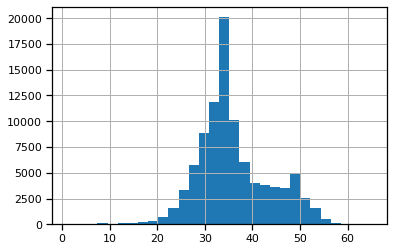

In [61]:
decals['smooth-or-featured_total-votes'].hist(bins=30)

In [62]:
decals['smooth-or-featured_featured-or-disk_fraction']

0        0.441176
1        0.057143
2        0.027027
3        0.319149
4        0.130435
           ...   
94019    0.666667
94020    0.416667
94021    0.405405
94022    0.062500
94023    0.750000
Name: smooth-or-featured_featured-or-disk_fraction, Length: 94024, dtype: float64

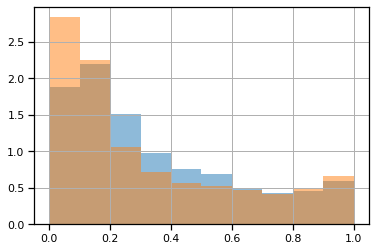

In [63]:
decals['smooth-or-featured_featured-or-disk_fraction'].hist(range=[0., 1.], alpha=.5, density=True)
gz2['t01_smooth_or_features_a02_features_or_disk_fraction'].hist(range=[0., 1.], alpha=.5, density=True)

Not that big a shift - but remember decals goes much deeper! Let's crossmatch

In [64]:
decals_gz2, _ = matching_utils.match_galaxies_to_catalog_pandas(decals, gz2)
len(decals_gz2)

33124

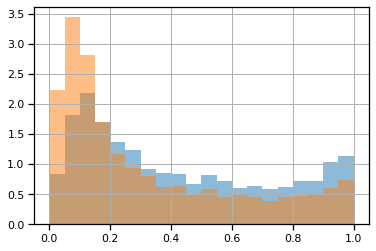

In [65]:
bins = 20
decals_gz2['smooth-or-featured_featured-or-disk_fraction'].hist(range=[0., 1.], alpha=.5, density=True, bins=bins)
gz2['t01_smooth_or_features_a02_features_or_disk_fraction'].hist(range=[0., 1.], alpha=.5, density=True, bins=bins)

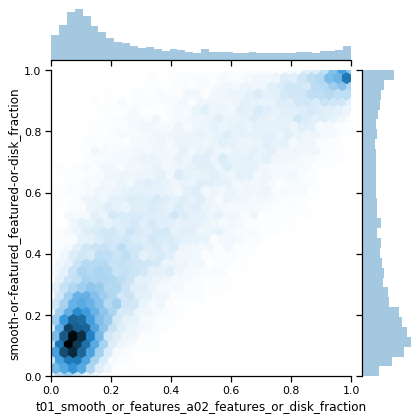

In [66]:

g = sns.jointplot(data=decals_gz2, y='smooth-or-featured_featured-or-disk_fraction', x='t01_smooth_or_features_a02_features_or_disk_fraction', kind='hex', xlim=[0., 1.], ylim=[0., 1.])

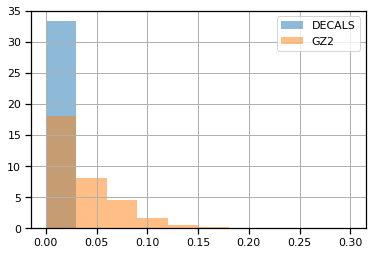

In [67]:
decals_gz2['smooth-or-featured_artifact_fraction'].hist(range=[0., .3], density=True, alpha=.5, label='DECALS')
decals_gz2['t01_smooth_or_features_a03_star_or_artifact_fraction'].hist(range=[0., .3], density=True, alpha=.5, label='GZ2')
plt.legend()

Text(23.125, 0.5, 'GZ DECaLS "Featured" fraction')

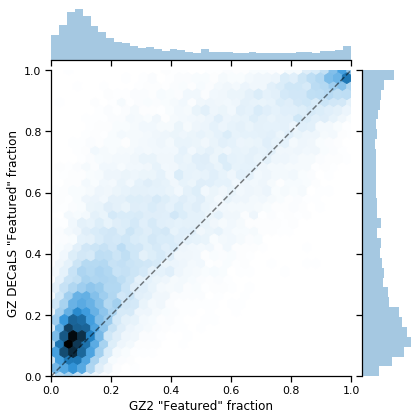

In [68]:
g = sns.jointplot(data=decals_gz2, y='smooth-or-featured_featured-or-disk_fraction', x='t01_smooth_or_features_a02_features_or_disk_fraction', kind='hex', xlim=[0., 1.], ylim=[0., 1.])
# https://github.com/mwaskom/seaborn/blob/master/seaborn/axisgrid.py#L1741
g.ax_joint.plot([0, 1.], [0., 1.], 'k--', alpha=.5)
g.ax_joint.set_xlabel('GZ2 "Featured" fraction')
g.ax_joint.set_ylabel('GZ DECaLS "Featured" fraction')
# plt.savefig('featured_comparison.pdf')
# plt.savefig('featured_comparison.png')

In [69]:
decals_gz2['smooth-or-featured_featured-or-disk_fraction_no_artifacts'] = decals_gz2['smooth-or-featured_featured-or-disk'] / (decals_gz2['smooth-or-featured_smooth'] + decals_gz2['smooth-or-featured_featured-or-disk'])
decals_gz2['t01_smooth_or_features_a02_features_or_disk_fraction_no_artifacts'] = decals_gz2['t01_smooth_or_features_a02_features_or_disk_count'] / (decals_gz2['t01_smooth_or_features_a01_smooth_count'] + decals_gz2['t01_smooth_or_features_a02_features_or_disk_count'])

ValueError: Could not interpret input 'smooth-or-featured_smooth_fraction_no_artifacts'

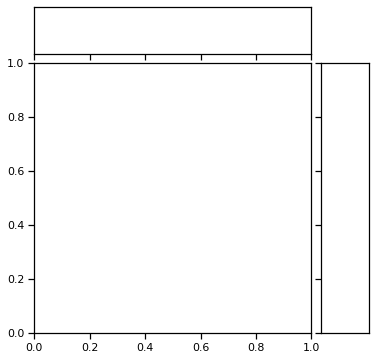

In [70]:
g = sns.jointplot(data=decals_gz2, y='smooth-or-featured_smooth_fraction_no_artifacts', x='t01_smooth_or_features_a02_features_or_disk_fraction_no_artifacts', kind='hex', xlim=[0., 1.], ylim=[0., 1.])
# https://github.com/mwaskom/seaborn/blob/master/seaborn/axisgrid.py#L1741
g.ax_joint.plot([0, 1.], [0., 1.], 'k--', alpha=.5)

In [ ]:
# fig, ax = plt.subplots(with sns.color_palette("Blues"):
#     plt.hexbin(decals_gz2['smooth-or-featured_featured-or-disk_fraction'], decals_gz2['t01_smooth_or_features_a02_features_or_disk_fraction'], gridsize=30, cmap='Blues')
#     # cmap=sns.color_palette("Blues")

In [ ]:
decals_gz2['gz2_png_loc'] = decals_gz2['png_loc'].apply(lambda x: x.replace('/Volumes/alpha', '/media/walml/beta/galaxy_zoo'))
decals_gz2['gz2_png_loc']

In [ ]:
decals_gz2['decals_png_loc'] = decals_gz2['iauname'].apply(lambda x: '/media/walml/beta/decals/png_native/dr5/' + x[:4] + '/' + x + '.png')
decals_gz2['decals_png_loc']

In [ ]:
def show_image_comparison(df, num_galaxies=5):
    df = df.query('both_images_exist')
    scale = 3.
    plt.figure(figsize=(scale * 2, scale * num_galaxies * 1.025))
    gs1 = gridspec.GridSpec(num_galaxies, 2)
    gs1.update(wspace=0.0, hspace=0.0)
    text_locs = (30, 60)
    size = 14
    for row_n in range(num_galaxies):
        
        galaxy = df.iloc[row_n]
        
        data = np.array(Image.open(galaxy['gz2_png_loc']))
        ax = plt.subplot(gs1[row_n, 0])
        ax.imshow(data)
        ax.axis('off')
        ax.text(*text_locs, 'GZ2: {:.2f}'.format(galaxy['t01_smooth_or_features_a02_features_or_disk_fraction']), color='r', size=size)
        
        data = np.array(Image.open(galaxy['decals_png_loc']))
        ax = plt.subplot(gs1[row_n, 1])
        ax.imshow(data)
        ax.axis('off')
        ax.text(*text_locs, 'DECaLS:{:.2f}'.format(galaxy['smooth-or-featured_featured-or-disk_fraction']), color='r', size=size)
        



In [ ]:
decals_gz2['change_in_featured_frac'] = decals_gz2['smooth-or-featured_featured-or-disk_fraction'] - decals_gz2['t01_smooth_or_features_a02_features_or_disk_fraction']
somewhat_featured = decals_gz2[(decals_gz2['t01_smooth_or_features_a02_features_or_disk_fraction'] > 0.25) & (decals_gz2['t01_smooth_or_features_a02_features_or_disk_fraction'] < 0.75)]
len(decals_gz2), len(somewhat_featured)

In [ ]:
median_pc_increase = (somewhat_featured['change_in_featured_frac'] / decals_gz2['smooth-or-featured_featured-or-disk_fraction']).median()
median_pc_increase

In [ ]:
median_increase = somewhat_featured['change_in_featured_frac'].median()
median_increase

In [ ]:
show_image_comparison(somewhat_featured.sample(10))

In [ ]:
decals_gz2['gz2_png_exists'] = decals_gz2['gz2_png_loc'].apply(os.path.isfile)
decals_gz2['decals_png_exists'] = decals_gz2['decals_png_loc'].apply(os.path.isfile)
decals_gz2['both_images_exist'] = decals_gz2['gz2_png_exists'] & decals_gz2['decals_png_exists']

In [ ]:
bad_iaunames = ['J152639.16+010632.0']  # dodgy images

In [ ]:
decals_gz2 = decals_gz2[~decals_gz2['iauname'].isin(bad_iaunames)]

In [ ]:

show_image_comparison(decals_gz2.sort_values('change_in_featured_frac', ascending=False))

In [ ]:
decals_gz2['change_in_featured_frac'] = decals_gz2['smooth-or-featured_featured-or-disk_fraction'] - decals_gz2['t01_smooth_or_features_a02_features_or_disk_fraction']
show_image_comparison(decals_gz2.sort_values('change_in_featured_frac', ascending=False)[:1000].sample(10), num_galaxies=6)
# plt.gcf().savefig('featured_galaxies_big_shift.pdf')
# plt.gcf().savefig('featured_galaxies_big_shift.png')

In [ ]:
decals_gz2.columns.values

In [ ]:
## and for featured galaxies

In [ ]:
featured = decals_gz2[(decals_gz2['t01_smooth_or_features_a02_features_or_disk_fraction'] > .5) & (decals_gz2['smooth-or-featured_featured-or-disk_fraction'] > 0.5)]
featured['t04_spiral_a08_spiral_fraction'].hist(alpha=.5, density=True, label='GZ2', bins=30)
featured['has-spiral-arms_yes_fraction'].hist(alpha=.5, density=True, label='DECALS', bins=30)
plt.legend()
plt.xlim([0., 1.])

In [ ]:
featured['t04_spiral_a08_spiral_fraction'].median(), featured['has-spiral-arms_yes_fraction'].median()

In [ ]:
featured['t04_spiral_a08_spiral_fraction'].median(), featured['has-spiral-arms_yes_fraction'].median()

In [ ]:

featured['t03_bar_a06_bar_fraction'].hist(alpha=.5, density=True, label='GZ2', bins=30)
featured['bar_yes_fraction'].hist(alpha=.5, density=True, label='DECALS', bins=30)
plt.legend()
plt.xlim([0., 1.])

In [ ]:
featured['t03_bar_a06_bar_fraction'].median(), featured['bar_yes_fraction'].median()

In [ ]:

featured['t11_arms_number_a37_cant_tell_fraction'].hist(alpha=.5, density=True, label='GZ2', bins=30)
featured['spiral-arm-count_cant-tell_fraction'].hist(alpha=.5, density=True, label='DECALS', bins=30)
plt.legend()
plt.xlim([0., 1.])

In [ ]:

g = sns.joifeatured['has-spiral-arms_yes_fraction'].hist()ntplot(data=decals_gz2, y='has-spiral-arms_yes_fraction', x='t01_smooth_or_features_a02_features_or_disk_fraction', kind='hex', xlim=[0., 1.], ylim=[0., 1.])
# https://github.com/mwaskom/seaborn/blob/master/seaborn/axisgrid.py#L1741
g.ax_joint.plot([0, 1.], [0., 1.], 'k--', alpha=.5)
# g.ax_joint.set_xlabel('GZ2 "Featured" fraction')
# g.ax_joint.set_ylabel('GZ DECaLS "Featured" fraction')
# plt.savefig('featured_comparison.pdf')
# plt.savefig('featured_comparison.png')